# Import Required Libraries
Import necessary libraries such as random, time, and matplotlib.pyplot.

In [1]:
import random
import time
import matplotlib.pyplot as plt

# Define Helper Functions
Define all the helper functions used in the algorithms, including scoring_function, hamming_distance, total_hamming_distance, l_mer_to_int_list, int_list_to_l_mer, next_l_mer, and cons_cov.

In [2]:
# Define Helper Functions

def scoring_function(s, DNA, l_mer):
    total_score = 0
    for i in range(l_mer):
        A = T = G = C = 0
        for j in range(len(s)):
            if DNA[j][s[j] + i] == 'a':
                A += 1
            elif DNA[j][s[j] + i] == 't':
                T += 1
            elif DNA[j][s[j] + i] == 'g':
                G += 1
            elif DNA[j][s[j] + i] == 'c':
                C += 1
        total_score += max(A, T, G, C)
    return total_score

def hamming_distance(p, q):
    distance = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            distance += 1
    return distance

def total_hamming_distance(DNA, l_mer):
    len_Lmer = len(l_mer)
    distance = 0
    positions = [0] * len(DNA)
    for i in range(len(DNA)):
        min_distance = len_Lmer
        for j in range(len(DNA[i]) - len_Lmer + 1):
            pattern = DNA[i][j:j + len_Lmer]
            current_distance = hamming_distance(pattern, l_mer)
            if current_distance < min_distance:
                min_distance = current_distance
                positions[i] = j
        distance += min_distance
    return distance, positions

def l_mer_to_int_list(l_mer):
    char_to_int = {'a': 0, 't': 1, 'g': 2, 'c': 3}
    return [char_to_int[char] for char in l_mer]

def int_list_to_l_mer(int_list):
    int_to_char = {0: 'a', 1: 't', 2: 'g', 3: 'c'}
    return ''.join([int_to_char[i] for i in int_list])

def next_l_mer(s, current_index):
    s = l_mer_to_int_list(s)
    if s[current_index] < 3:
        s[current_index] += 1
        return int_list_to_l_mer(s)
    else:
        if current_index == len(s) - 1:
            return None
        s[current_index] = 0
        return next_l_mer(int_list_to_l_mer(s), current_index + 1)

def cons_cov(motif):
    l = len(motif[0])
    s = len(motif)

    to_return = ''

    for i in range(l):
        A = T = G = C = 0
        for j in range(s):
            if motif[j][i] == 'a':
                A += 1
            elif motif[j][i] == 't':
                T += 1
            elif motif[j][i] == 'g':
                G += 1
            elif motif[j][i] == 'c':
                C += 1
        max_here = max(A, T, G, C)
        if max_here == A:
            to_return += 'a'
        elif max_here == T:
            to_return += 't'
        elif max_here == G:
            to_return += 'g'
        elif max_here == C:
            to_return += 'c'
    return to_return

# Define Main Algorithms
Define the main algorithms: BruteForce, MedianString, and GibbsSampling.

In [3]:
# Define Main Algorithms

def BruteForce(DNA):
    l_mer = 6
    best_score = 0
    best_motif = []
    s = [0] * len(DNA)

    def next_index(s, current_index, limit):
        if s[current_index] < limit:
            s[current_index] += 1
            return s
        else:
            if current_index == len(s) - 1:
                return None
            s[current_index] = 0
            return next_index(s, current_index + 1, limit)

    while s is not None:
        new_score = scoring_function(s, DNA, l_mer)
        if new_score > best_score:
            best_score = new_score
            best_motif = [DNA[i][s[i]:s[i] + l_mer] for i in range(len(DNA))]
        s = next_index(s, 0, len(DNA[0]) - l_mer)

    return best_motif, best_score

def MedianString(DNA):
    l_mer = 'aaaaaa'
    min_distance, final_lmer = total_hamming_distance(DNA, l_mer)

    while l_mer is not None:
        new_distance, _ = total_hamming_distance(DNA, l_mer)
        if new_distance < min_distance:
            min_distance = new_distance
            final_lmer = l_mer
        l_mer = next_l_mer(l_mer, 0)

    return final_lmer, min_distance

def GibbsSampling(DNA, iterations=500):
    l_mer = 6
    DNA_size = len(DNA)
    seq_size = len(DNA[0])
    s = [0] * DNA_size

    best_score = 0
    best_motif = []
    scores = []

    for _ in range(iterations):
        for i in range(DNA_size):
            rand = random.randint(0, seq_size - l_mer)
            s[i] = rand

        current_score = scoring_function(s, DNA, l_mer)
        scores.append(current_score)

        if current_score > best_score:
            best_score = current_score
            best_motif = [DNA[i][s[i]:s[i] + l_mer] for i in range(DNA_size)]

    return best_motif, best_score, scores

# Load DNA Data
Load the DNA data from a file named 'data.txt'.

In [4]:
# Load DNA Data

with open('data.txt', 'r') as file:
    DNA = file.read().splitlines()

DNA

['gcggaagagggcactagcccatgtgagagggcaaggacca',
 'atctttctcttaaaaataacataattcagggccaggatgt',
 'gtcacgagctttatcctacagatgatgaatgcaaatcagc',
 'taaaagataatatcgaccctagcgtggcgggcaaggtgct']

# Run, Plot and Compare Algorithms
Run the BruteForce, MedianString, and GibbsSampling algorithms, and compare their results in terms of best motif, best score, and time taken.

BruteForce -> Best Motif: ['gggcaa', 'gggcca', 'atgcaa', 'gggcaa'], Best Score: 21, Time Taken: 16.52 seconds
MedianString -> Best Motif: gggcaa, Best Score: 3, Time Taken: 0.66 seconds
GibbsSampling -> Best Motif: ['cactag', 'aaataa', 'aaatca', 'agataa'], Best Score: 19, Time Taken: 0.71 seconds


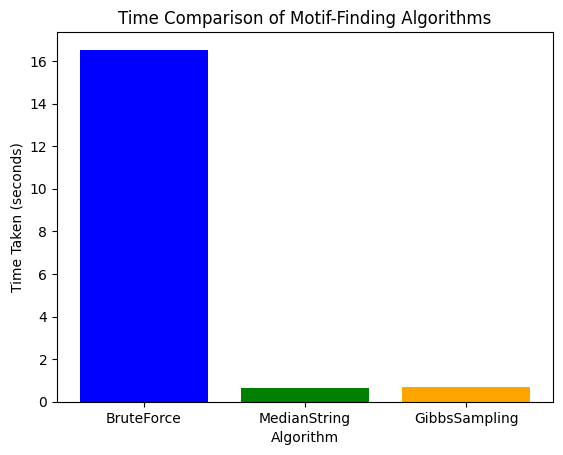

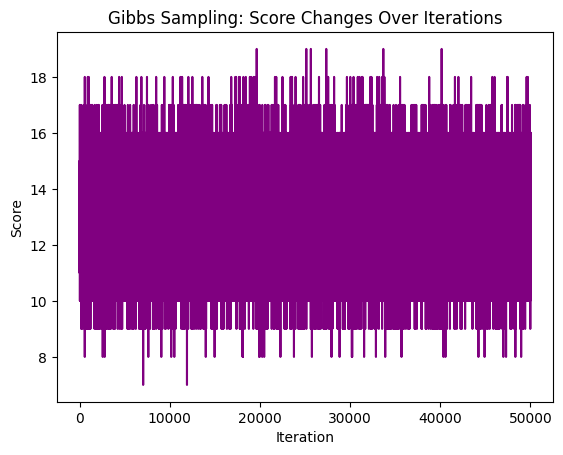

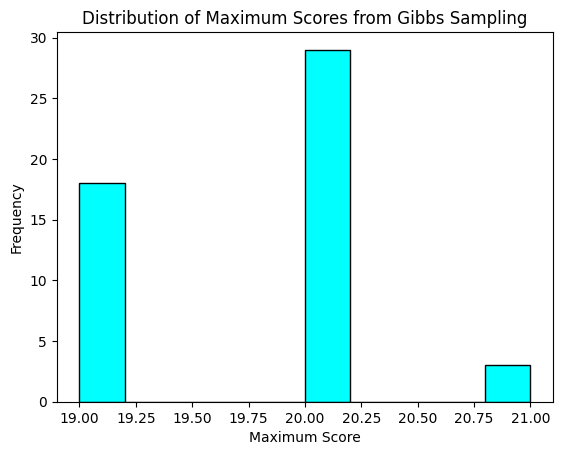

In [5]:
# Run and Compare Algorithms

# Run BruteForce Algorithm
start = time.time()
brute_motif, brute_score = BruteForce(DNA)
brute_time = time.time() - start

# Run MedianString Algorithm
start = time.time()
median_motif, median_score = MedianString(DNA)
median_time = time.time() - start

# Run GibbsSampling Algorithm
start = time.time()
gibbs_motif, gibbs_score, gibbs_scores = GibbsSampling(DNA, iterations=50000)
gibbs_time = time.time() - start

# Store results in a dictionary
results = {
    'BruteForce': (brute_motif, brute_score, brute_time),
    'MedianString': (median_motif, median_score, median_time),
    'GibbsSampling': (gibbs_motif, gibbs_score, gibbs_time)
}

# Print results
for method, (motif, score, elapsed) in results.items():
    print(f"{method} -> Best Motif: {motif}, Best Score: {score}, Time Taken: {elapsed:.2f} seconds")

# Plot time comparison
methods = list(results.keys())
times = [results[method][2] for method in methods]

plt.bar(methods, times, color=['blue', 'green', 'orange'])
plt.xlabel('Algorithm')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Comparison of Motif-Finding Algorithms')
plt.show()

# Plot Gibbs Sampling score changes over iterations
plt.plot(gibbs_scores, color='purple')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Gibbs Sampling: Score Changes Over Iterations')
plt.show()

# Run GibbsSampling multiple times and plot the distribution of maximum scores
gibbs_repeat_scores = []
num_repeats = 50
for _ in range(num_repeats):
    _, _, scores = GibbsSampling(DNA, iterations=50000)
    gibbs_repeat_scores.append(max(scores))

plt.hist(gibbs_repeat_scores, bins=10, color='cyan', edgecolor='black')
plt.xlabel('Maximum Score')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Scores from Gibbs Sampling')
plt.show()